In [35]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import a_funciones as fn 
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression, Lasso
from sklearn import tree ###para ajustar arboles de decisión


In [36]:
#Se vuelve a llamar la base de datos para la seleccion de variables
data = pd.read_csv("https://raw.githubusercontent.com/jsebastianzm/HR_T1_Analitica/main/data/data_preprocesamiento.csv")

In [37]:
#Es necesario volver a asignar las variables como variables object ya que al crearse el dataframe y volver
# a leerse con la libreria pandas, las variables vuelven a cambiar de tipo.
columns_category = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EmployeeID', 'Gender', 
'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 
'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating', 'Attrition']
data[columns_category] = data[columns_category].astype(object)
data.drop(['EmployeeID'], axis = 1, inplace = True)

In [38]:
#Se asignan las variables object a variables dummies
dummies_variables = ["BusinessTravel", "Department", "Education", "EducationField", "Gender", "JobLevel", 
                     "Gender", "JobLevel", "JobRole", "MaritalStatus", "StockOptionLevel", "EnvironmentSatisfaction", 
                     "JobSatisfaction", "WorkLifeBalance", "JobInvolvement", "PerformanceRating"]
data_dummies = pd.get_dummies(data, columns=dummies_variables)

In [39]:
#Se separan las bases de datos en la variable a predecir y las variables independientes
y = data_dummies["Attrition"]
x = data_dummies.loc[:, ~data_dummies.columns.isin(['Attrition'])]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 75 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   DistanceFromHome                   4410 non-null   float64
 2   MonthlyIncome                      4410 non-null   float64
 3   NumCompaniesWorked                 4410 non-null   int64  
 4   PercentSalaryHike                  4410 non-null   int64  
 5   TotalWorkingYears                  4410 non-null   int64  
 6   TrainingTimesLastYear              4410 non-null   int64  
 7   YearsAtCompany                     4410 non-null   int64  
 8   YearsSinceLastPromotion            4410 non-null   int64  
 9   YearsWithCurrManager               4410 non-null   int64  
 10  BusinessTravel_Non-Travel          4410 non-null   uint8  
 11  BusinessTravel_Travel_Frequently   4410 non-null   uint8

In [40]:
#Se aplica labelencoder a la variables Y
encoder = LabelEncoder()

# Ajustar y transformar las categorías
y = encoder.fit_transform(y)
y = pd.DataFrame(y, columns = ['Attrition'])
y.head()



,Attrition
0,0
1,1
2,0
3,0
4,0


In [41]:
scaler=StandardScaler()
scaler.fit(x)
X2=scaler.transform(x)
X=pd.DataFrame(X2,columns=x.columns)


In [42]:
m_lreg = LogisticRegression()
m_rtree=tree.DecisionTreeRegressor()
m_rf= RandomForestClassifier()
m_gbt=GradientBoostingClassifier()

modelos=list([m_lreg,m_rtree, m_rf, m_gbt])
# modelos=list([m_lreg,m_rtree])



In [43]:
#
var_names_models=fn.sel_variables(modelos,X,y,threshold="1.7*mean")
var_names_models.shape


(19,)

In [44]:
#Se aplica seleccion de variables con el metodo Lasso
var_names_lasso=fn.sel_variablesLasso(modelos,X,y,alpha=0.03,max_features=15)
var_names_lasso.shape

(10,)

In [45]:
X_mod=X[var_names_models] ### matriz con variables seleccionadas
print(X_mod.shape, X.shape)

(4410, 19) (4410, 75)


In [46]:
X_Lasso=X[var_names_lasso] ### matriz con variables seleccionadas
print(X_Lasso.shape, X.shape)

(4410, 10) (4410, 75)


In [47]:
# X_mod.head()

In [63]:
#Medicion de los modelos para la clasificacion
F1_df=fn.medir_modelos(modelos,"f1",X,y,10) ## base con todas las variables 
F1_mod=fn.medir_modelos(modelos,"f1",X_mod,y,10) ### base con variables seleccionadas
F1_Lasso=fn.medir_modelos(modelos,"f1",X_Lasso,y,10) ### base con variables seleccionadas

In [64]:
F1_Lasso

,reg_logistic,decision_tree,random_forest,gradient_boosting
0,0.238095,NaN,0.926471,0.446602
1,0.252874,NaN,0.964539,0.524272
2,0.204545,NaN,0.957746,0.369565
3,0.222222,NaN,0.958904,0.375000
4,0.216867,NaN,0.948905,0.514851
5,0.333333,NaN,0.950355,0.475248
6,0.172840,NaN,0.959459,0.307692
7,0.195122,NaN,0.948905,0.408163
8,0.326087,NaN,0.935252,0.538462
9,0.144578,NaN,0.965986,0.361702


## Toca agregar y completar el boxplot siguiente

<AxesSubplot: >

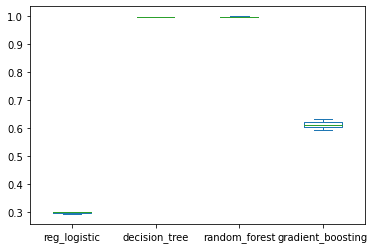

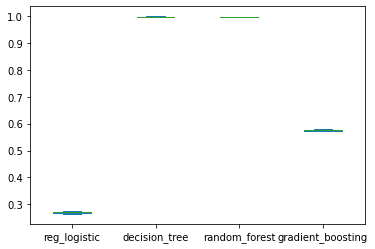

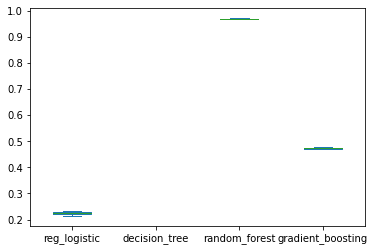

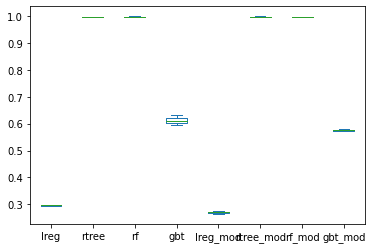

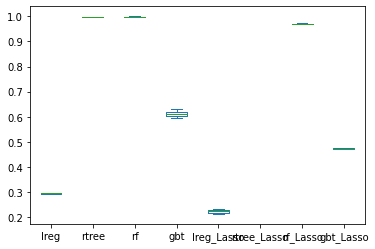

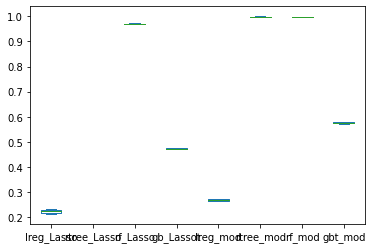

In [60]:
F1_score1 =pd.concat([F1_df,F1_mod],axis=1)
F1_score1.columns=['lreg', 'rtree', 'rf', 'gbt',
    'lreg_mod', 'rtree_mod', 'rf_mod', 'gbt_mod']

F1_score2 =pd.concat([F1_df,F1_Lasso],axis=1)
F1_score2.columns=['lreg', 'rtree', 'rf', 'gbt',
    'lreg_Lasso', 'rtree_Lasso', 'rf_Lasso', 'gbt_Lasso']

F1_score3 =pd.concat([F1_Lasso,F1_mod],axis=1)
F1_score3.columns=['lreg_Lasso', 'rtree_Lasso', 'rf_Lasso', 'gb_Lassot',
    'lreg_mod', 'rtree_mod', 'rf_mod', 'gbt_mod']

F1_df.plot(kind='box') #### gráfico para modelos todas las varibles
F1_mod.plot(kind='box') ### gráfico para modelo variables seleccionadas
F1_Lasso.plot(kind='box') ### gráfico para modelos sel y todas las variables
F1_score1.plot(kind='box')
F1_score2.plot(kind='box')
F1_score3.plot(kind='box')

In [68]:
F1_df.mean()

reg_logistic         0.283155
decision_tree        0.996404
random_forest        0.999291
gradient_boosting    0.511860
dtype: float64

In [69]:
F1_mod.mean()

reg_logistic         0.272481
decision_tree        0.997058
random_forest        0.997872
gradient_boosting    0.522281
dtype: float64

In [70]:
F1_Lasso.mean()

reg_logistic         0.230656
decision_tree             NaN
random_forest        0.951652
gradient_boosting    0.432156
dtype: float64

In [65]:
F1_score1.mean()####################################################

lreg         0.296215
rtree        0.997886
rf           0.998591
gbt          0.611866
lreg_mod     0.269347
rtree_mod    0.997175
rf_mod       0.997178
gbt_mod      0.575878
dtype: float64

In [66]:
F1_score2.mean()#####################################################

lreg           0.296215
rtree          0.997886
rf             0.998591
gbt            0.611866
lreg_Lasso     0.223485
rtree_Lasso         NaN
rf_Lasso       0.970133
gbt_Lasso      0.473672
dtype: float64

In [67]:
F1_score3.mean() #####################################################

lreg_Lasso     0.223485
rtree_Lasso         NaN
rf_Lasso       0.970133
gb_Lassot      0.473672
lreg_mod       0.269347
rtree_mod      0.997175
rf_mod         0.997178
gbt_mod        0.575878
dtype: float64

In [ ]:
# # Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
# #Estandarización de variables númericas
# numeric_columns = data_dummies.loc[:, data_dummies.columns.isin(['Age', 'DistanceFromHome', 'EmployeeID', 
#                                 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
#                                 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])]
# pipeline=ColumnTransformer([( "std_numericas",StandardScaler() , numeric_columns)], remainder='passthrough')

# x_train = pipeline.fit_transform(x_train)
# x_test = pipeline.transform(x_test)